# Mounting My Driver

In [ ]:
# Mounting the drive to acess the data files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Liberaries

In [ ]:
# It commonly used "pip install + library" command to install most of the librarieS
pip install spectral

     |████████████████████████████████| 215kB 5.5MB/s 


In [ ]:
 from spectral import *
 import scipy.io as spio

# Botswana

In [ ]:
# IN This command , i acess the data files
botswana = spio.loadmat('/content/drive/MyDrive/Downloads/Botswana.mat')
botswana_gt= spio.loadmat('/content/drive/MyDrive/Downloads/Botswana_gt.mat')

In [ ]:
# THE DATA is in Dictionay format
# here i acessed the data part, neglecting the labels 
Botswana =botswana ['Botswana']
Botswana_gt=botswana_gt['Botswana_gt']

In [ ]:
# DATA information
Botswana.shape

(1476, 256, 145)

In [ ]:
pixel=Botswana[50 , 100]

In [ ]:
pixel.shape

(145,)

In [ ]:
bands=Botswana[ : , : , :1]

In [ ]:
bands.shape

(1476, 256, 1)

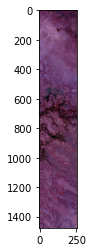

In [ ]:
# Image Data Display
# The imshow function produces a raster display of data associated with an np.ndarray or SpyFile object.
view = imshow(Botswana,(29,19,91))

In [ ]:
# RGB data limits for a displayed image can be printed from the __str__ method of the ImageView object
print(view)

ImageView object:
  Display bands       :  (29, 19, 91)
  Interpolation       :  <default>
  RGB data limits     :
    R: [546.0, 9426.0]
    G: [911.0, 9565.0]
    B: [0.0, 2280.0]



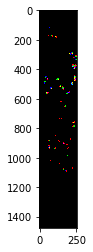

In [ ]:
#Class Map Display
# To display the ground truth image using imshow, set the classes argument in the imshow function:
view=imshow(classes=Botswana_gt)

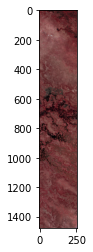

In [ ]:
# For example, to display the image with overlayed class masks, 
# using an alpha transparency of 0.5, 
# type the following commands after calling imshow:
view = imshow(Botswana,(30,20,10),classes=Botswana_gt)
view.set_display_mode('overlay')
view.class_alpha=0.5

## Unsupervised Classification¶

In [ ]:
# Unsupervised classification algorithms divide image pixels into groups 
#based on spectral similarity of the pixels without using any prior knowledge of the spectral classes.

In [ ]:
# k-means Clustering
# This line of code will display : k-means clustering results¶
(m, c) = kmeans(Botswana, 20, 30)

spectral:INFO: k-means iteration 1 - 376740 pixels reassigned.
spectral:INFO: k-means iteration 2 - 25182 pixels reassigned.
spectral:INFO: k-means iteration 3 - 19414 pixels reassigned.
spectral:INFO: k-means iteration 4 - 17589 pixels reassigned.
spectral:INFO: k-means iteration 5 - 16152 pixels reassigned.
spectral:INFO: k-means iteration 6 - 15109 pixels reassigned.
spectral:INFO: k-means iteration 7 - 13897 pixels reassigned.
spectral:INFO: k-means iteration 8 - 12938 pixels reassigned.
spectral:INFO: k-means iteration 9 - 11795 pixels reassigned.
spectral:INFO: k-means iteration 10 - 11323 pixels reassigned.
spectral:INFO: k-means iteration 11 - 10589 pixels reassigned.
spectral:INFO: k-means iteration 12 - 9802 pixels reassigned.
spectral:INFO: k-means iteration 13 - 9320 pixels reassigned.
spectral:INFO: k-means iteration 14 - 8878 pixels reassigned.
spectral:INFO: k-means iteration 15 - 8524 pixels reassigned.
spectral:INFO: k-means iteration 16 - 8268 pixels reassigned.
spect

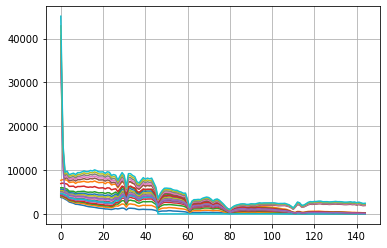

In [ ]:
import matplotlib.pyplot as plt

plt.figure()

for i in range(c.shape[0]):
    plt.plot(c[i])
   

plt.grid()

## Supervised Classification

In [ ]:
#Training Data
# Performing supervised classification requires training a classifier with training data
# that associates samples with particular training classes. To assign class labels to pixels in an image 
# having M rows and N columns, you must provide an MxN integer-valued ground truth array whose elements are indices for
# the corresponding training classes. A value of 0 in the ground truth array indicate an unlabeled pixel
# (the pixel is not associated with a training class)."""

In [ ]:
classes = create_training_classes(Botswana , Botswana_gt)

In [ ]:
#Gaussian Maximum Likelihood Classification
# In this case, we’ll perform Gaussian Maximum Likelihood Classification (GMLC)
gmlc = GaussianClassifier(classes)

spectral:INFO: Setting min samples to 145
spectral:WARNING: Omitting class   2 : only 101 samples present
spectral:WARNING: Omitting class  14 : only 95 samples present


In [ ]:
# When we created the classifier, it was automatically trained on the training sets we provided. 
# Notice that the classifier ignored five of the training classes. 
# GMLC requires computing the inverse of the covariance matrix for each training class. 
#Since our sample image contains 220 spectral bands, classes with fewer than 220 samples will have singular covariance matrices, 
# for which we can’t compute the inverse.
# Once the classifier is trained, we can use it to classify an image having the same spectral bands as the training set. 
# Let’s classify our training image and display the resulting classification map.

Processing...  0.0%Processing...  8.3%Processing... 16.7%Processing... 25.0%Processing... 33.3%Processing... 41.7%Processing... 50.0%Processing... 58.3%Processing... 66.7%Processing... 75.0%Processing... 83.3%Processing... 91.7%Processing... 100.0%Processing...done   


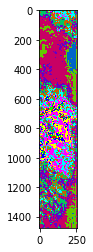

In [ ]:
clmap = gmlc.classify_image(Botswana)
v =imshow(classes=clmap)

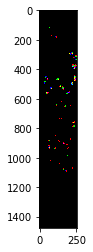

In [ ]:
#The classification map above shows classification results for the entire image. 
#To view results for only the ground truth pixels we must mask out all the pixels not associated with
# a training class.
gtresults = clmap * (Botswana_gt != 0)
v = imshow(classes=gtresults)

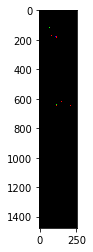

In [ ]:
#If the classification results are good, we expect the classification map above to
#look very similar to the original ground truth map. To view only the errors, 
#we must mask out all elements in gtResults that do not match the ground truth image.
gterrors = gtresults * (gtresults != Botswana_gt)
v = imshow(classes=gterrors)

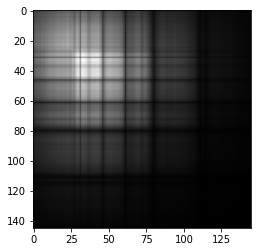

In [ ]:
# Dimensionality Reduction
# Processing hyperspectral images with hundreds of bands can be computationally burdensome and classification accuracy 
# may suffer due to the so-called “curse of dimensionality”. To mitigate these problems, 
# it is often desirable to reduce the dimensionality of the data.
pc = principal_components(Botswana)
v = imshow(pc.cov)

In [ ]:
#To reduce dimensionality using principal components,
# we can sort the eigenvalues in descending order and then retain enough eigenvalues
pc_0999 = pc.reduce(fraction=0.999)

In [ ]:
 # How many eigenvalues are left?
 len(pc_0999.eigenvalues)

42

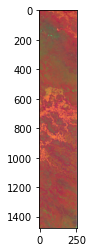

In [ ]:
 img_pc = pc_0999.transform(Botswana)
 v = imshow(img_pc[:,:,:3], stretch_all=True)